# <span style="color:red">Using the FIRST DATASET I.E TITANIC_TRAIN.CSV</span>

# Exploratory Data Analysis (EDA):
###  Step 1: Load the Titanic dataset using pandas

In [1]:
import pandas as pd

train_data = pd.read_csv("Titanic_train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dropping useless column

In [2]:
train_data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 2: Check for missing values

In [5]:
print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


### Step 3: Explore data distributions using histograms and box plots

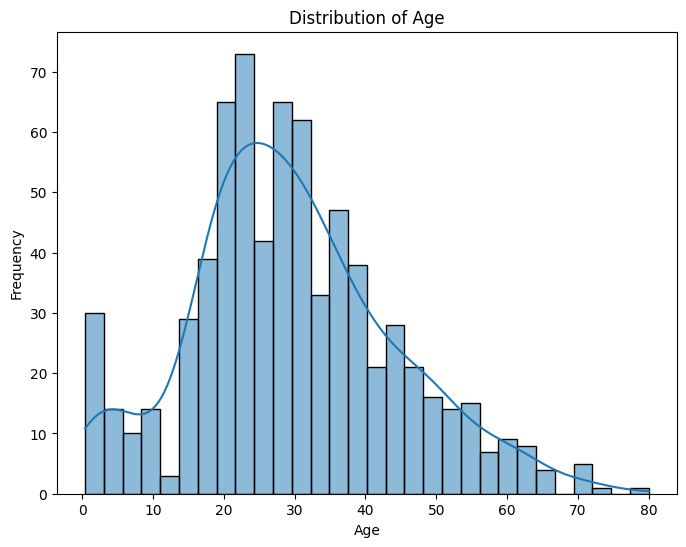

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

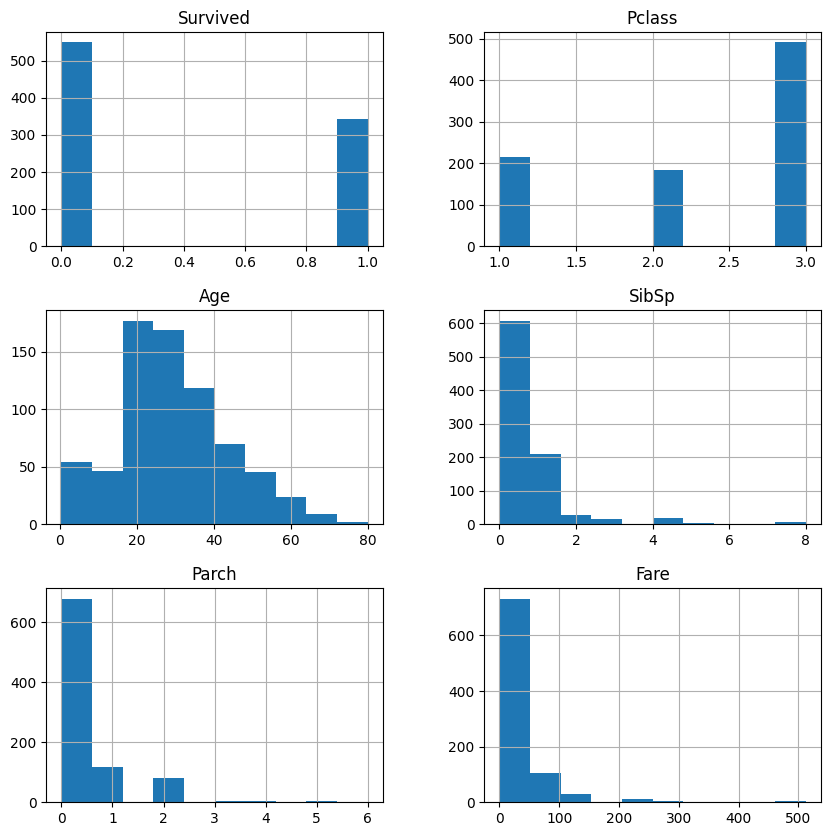

In [7]:
train_data.hist(figsize=(10, 10))
plt.show()

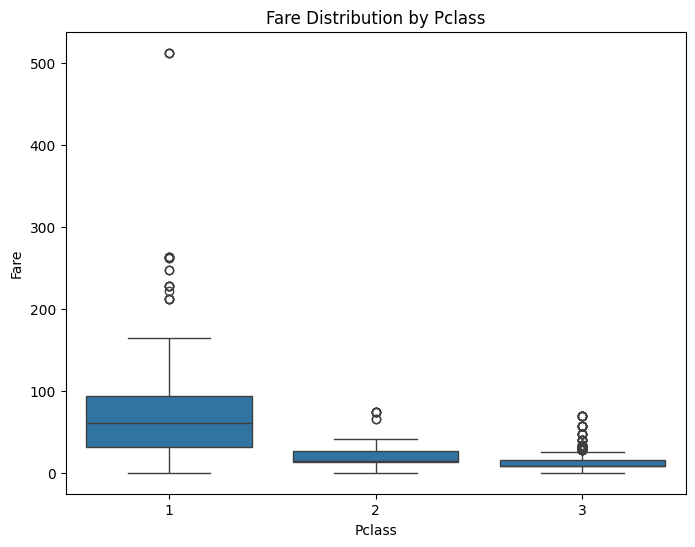

In [8]:
# Box plot of Fare by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

### Step 4: Visualize relationships between features and survival

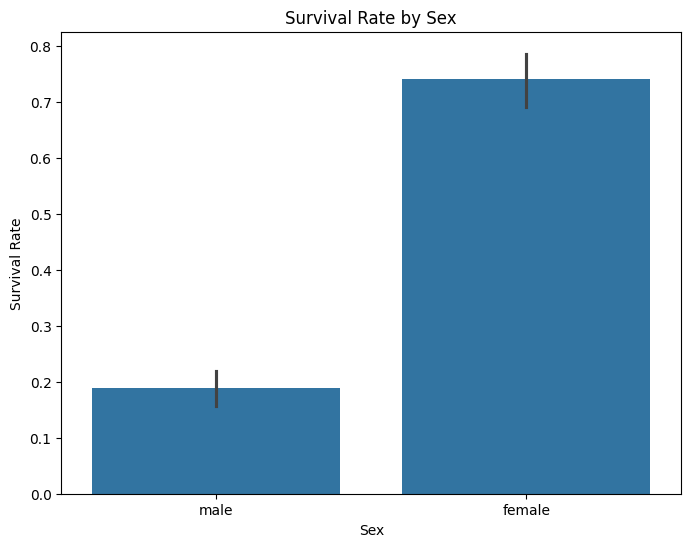

In [9]:
# Bar plot of Survival by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Data Preprocessing:
### Step 1: Impute missing values

In [10]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data["Embarked"].fillna("S",inplace=True)

In [11]:
print(train_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Check for outliers

<Axes: >

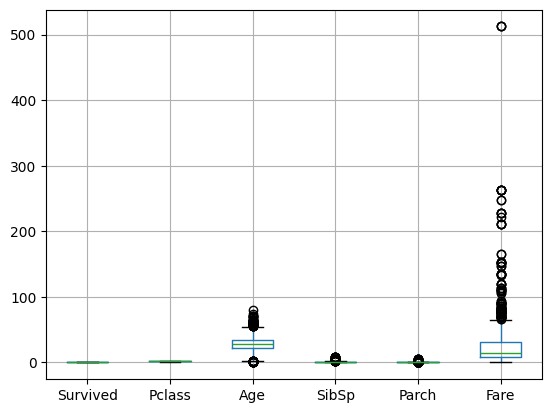

In [12]:
train_data.boxplot()

### Capping outliers with its lower and upper extreme

In [13]:
# writing a function to find upper amd lower extremes
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [14]:
outlier_detection(train_data,'Age')

(2.5, 54.5)

In [15]:
# Writing a function to get lower and upper extremes of all columns

# Defining a function to calculate lower and upper extremes using outlier_detection function
def calculate_extremes(df, colname):
    lower_extreme, upper_extreme = outlier_detection(df, colname)
    return lower_extreme, upper_extreme

# Defining a list of column names for which we want to calculate extremes
columns_to_process = ["Age","SibSp","Parch","Fare"]

# Initializing an empty dictionary to store column-extreme mappings
columns_dict = {}

# Populating the dictionary with column names and their respective lower/upper extremes
for colname in columns_to_process:
    lower_extreme, upper_extreme = calculate_extremes(train_data, colname)
    columns_dict[colname] = (lower_extreme, upper_extreme)

# Printing the resulting dictionary
print(columns_dict)

{'Age': (2.5, 54.5), 'SibSp': (-1.5, 2.5), 'Parch': (0.0, 0.0), 'Fare': (-26.724, 65.6344)}


In [16]:
# Capping the outliers of all columns with thier respective lower and upper extremes

def cap_outliers(df, colname, lower_extreme, upper_extreme):
    # Cap values above upper extreme
    df.loc[df[colname] > upper_extreme, colname] = upper_extreme
    
    # Cap values below lower extreme
    df.loc[df[colname] < lower_extreme, colname] = lower_extreme

def cap_outliers_in_df(df, columns_dict):
    for colname, (lower_extreme, upper_extreme) in columns_dict.items():
        cap_outliers(df, colname, lower_extreme, upper_extreme)

# Defining a dictionary with column names and their corresponding lower/upper extremes which we got from columns_dict
columns_dict = {
    'Age': (3.0, 54.0), 'SibSp': (-2.0, 2.0), 'Parch': (0.0, 0.0), 'Fare': (-26.724, 65.6344)
}

# Calling cap_outliers_in_df to cap outliers in all specified columns
cap_outliers_in_df(train_data, columns_dict)

<Axes: >

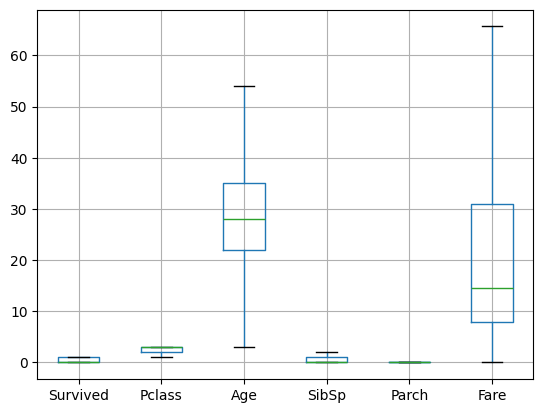

In [17]:
train_data.boxplot()

### Step 2: Encode categorical variables using one-hot encoding or label encoding

In [18]:
train_data = pd.get_dummies(train_data, columns=['Sex','Embarked'], dtype=int)

In [19]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,65.6344,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Building Predictive Models:
### Step 1: Split the preprocessed dataset into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Build predictive models using LightGBM and XGBoost algorithms

In [21]:
import warnings
warnings.filterwarnings("ignore")

import lightgbm as lgb
import xgboost as xgb

lgb_model = lgb.LGBMClassifier(verbose=-1)
xgb_model = xgb.XGBClassifier()

### Step 3: Train the models on the training set and evaluate their performance on the testing set

In [22]:
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

accuracy = accuracy_score(y_test, lgb_pred)
precision = precision_score(y_test, lgb_pred)
recall = recall_score(y_test, lgb_pred)
f1 = f1_score(y_test, lgb_pred)
roc_auc = roc_auc_score(y_test, lgb_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC_AUC:", roc_auc)


Accuracy: 0.8212290502793296
Precision: 0.7916666666666666
Recall: 0.7702702702702703
F1-score: 0.7808219178082192
ROC_AUC: 0.8137065637065637


In [24]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
roc_auc = roc_auc_score(y_test, xgb_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC_AUC:", roc_auc)

Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-score: 0.75
ROC_AUC: 0.7886743886743887


# Comparative Analysis:
### Functions to Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models and Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [25]:
# Function to calculate and plot performance metrics
def plot_performance_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

    
# Function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (ROC-AUC = {roc_auc_score(y_true, y_pred):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    

import numpy as np
# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Calculate percentages

    plt.figure(figsize=(8, 6))  # Adjust figure size
    plt.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks([0, 1], ['Not Survived', 'Survived'])
    plt.yticks([0, 1], ['Not Survived', 'Survived'])

    # Add text annotations
    thresh = cm_percent.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]} ({cm_percent[i, j]*100:.2f}%)",
                     horizontalalignment="center",
                     color="white" if cm_percent[i, j] > thresh else "black")

    plt.show()

### Step 5: Using techniques like cross-validation and hyperparameter tuning to optimize model performance
### LGBM

In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV for LightGBM
param_grid = {
    'n_estimators': [49,50,51],
    'num_leaves': [7,8,9],
    'max_depth': [2,3,4],
    'learning_rate': [0.2,0.21,0.22]
}

grid_search = GridSearchCV(lgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.21, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 8}


Performance Metrics for LightGBM:
Accuracy: 0.8324, Precision: 0.8235, Recall: 0.7568, F1-score: 0.7887, ROC-AUC: 0.8212


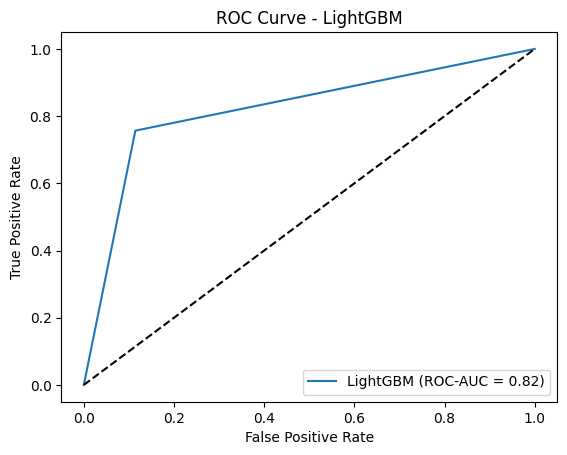

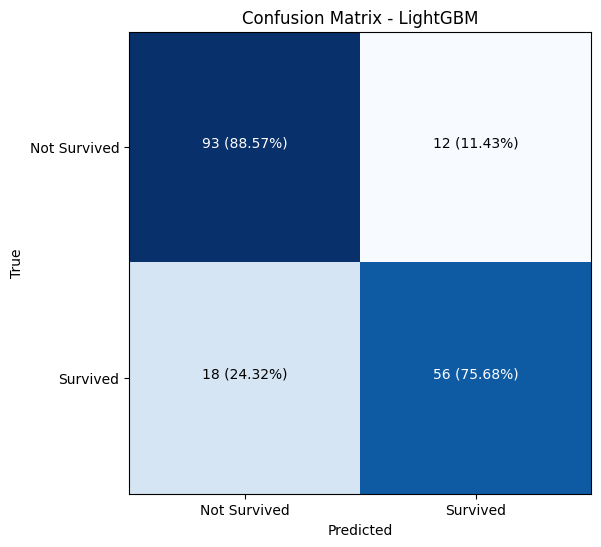

In [27]:
lgb_model = lgb.LGBMClassifier(**best_params,verbose=-1)

lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)

# Calculate and plot performance metrics for LightGBM
plot_performance_metrics("LightGBM", y_test, lgb_pred)

# Plot ROC curve for LightGBM
plot_roc_curve("LightGBM", y_test, lgb_pred)

# Plot confusion matrix for LightGBM
plot_confusion_matrix("LightGBM", y_test, lgb_pred)

### XGBM:

In [28]:
# Hyperparameter tuning using GridSearchCV for LightGBM
param_grid = {
    'booster': ['gbtree','gblinear','dart'],
    'gamma': [0,0.1],
    'n_estimators': [59,60,61],
    'max_depth': [6,7,8],
    'learning_rate': [0.05,0.1,0.2]
}

grid_search = GridSearchCV(lgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 60}


Performance Metrics for XGBoost:
Accuracy: 0.8380, Precision: 0.8462, Recall: 0.7432, F1-score: 0.7914, ROC-AUC: 0.8240


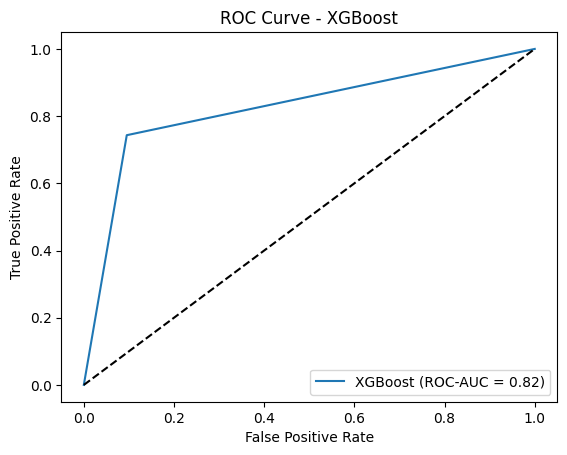

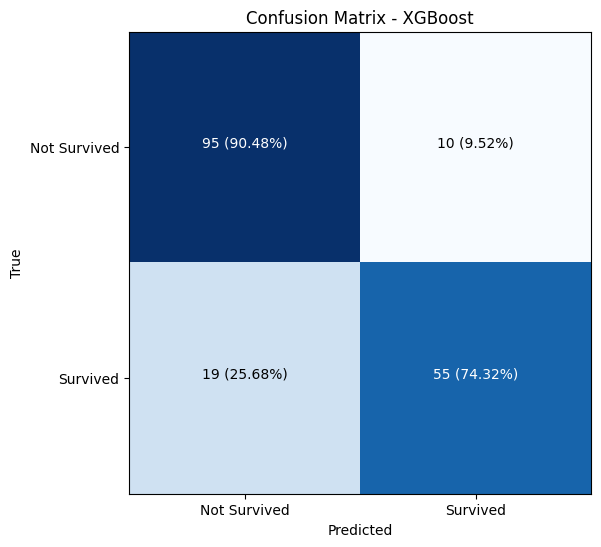

In [29]:
xgb_model = xgb.XGBClassifier(**best_params)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

# Calculate and plot performance metrics for XGBoost
plot_performance_metrics("XGBoost", y_test, xgb_pred)

# Plot ROC curve for XGBoost
plot_roc_curve("XGBoost", y_test, xgb_pred)

# Plot confusion matrix for XGBoost
plot_confusion_matrix("XGBoost", y_test, xgb_pred)

# <span style="color:red">Using the SECOND DATASET I.E TITANIC_TEST.CSV</span>

### Repeating same steps as above for data pre-processing on <span style="color:red">Titanic_test</span> dataset before model prediction

In [30]:
test_data = pd.read_csv("Titanic_test.csv")

df = test_data.copy()

test_data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [31]:
print(test_data.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [32]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [33]:
print(test_data.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<Axes: >

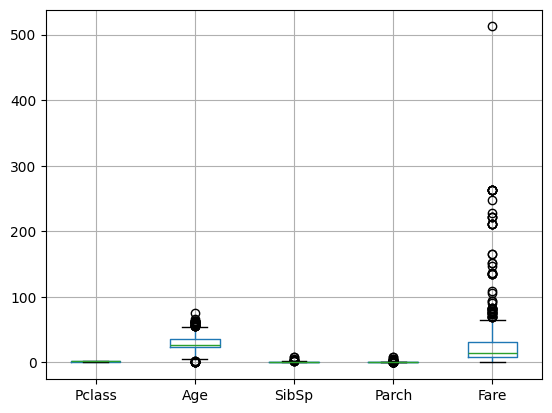

In [34]:
test_data.boxplot()

In [35]:
# Initializing an empty dictionary to store column-extreme mappings
columns_dict = {}

# Populating the dictionary with column names and their respective lower/upper extremes
for colname in columns_to_process:
    lower_extreme, upper_extreme = calculate_extremes(test_data, colname)
    columns_dict[colname] = (lower_extreme, upper_extreme)

# Printing the resulting dictionary
print(columns_dict)

{'Age': (3.875, 54.875), 'SibSp': (-1.5, 2.5), 'Parch': (0.0, 0.0), 'Fare': (-27.468312499999996, 66.8359875)}


In [36]:
# Defining a dictionary with column names and their corresponding lower/upper extremes which we got from columns_dict
columns_dict = {
    'Age': (4.0, 54.0), 'SibSp': (-1.5, 2.5), 'Parch': (0.0, 0.0), 'Fare': (-27.4683, 66.8359)
}

# Calling cap_outliers_in_df to cap outliers in all specified columns
cap_outliers_in_df(test_data, columns_dict)

<Axes: >

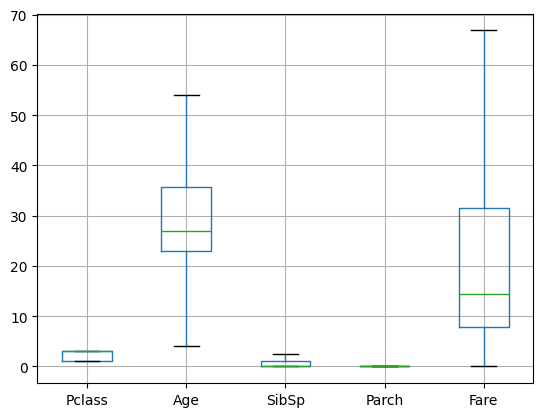

In [37]:
test_data.boxplot()

In [38]:
test_data = pd.get_dummies(test_data, columns=['Sex','Embarked'], dtype=int)

In [39]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0.0,0,7.8292,0,1,0,1,0
1,3,47.0,1.0,0,7.0000,1,0,0,0,1
2,2,54.0,0.0,0,9.6875,0,1,0,1,0
3,3,27.0,0.0,0,8.6625,0,1,0,0,1
4,3,22.0,1.0,0,12.2875,1,0,0,0,1


# Making Predictions on the <span style="color:red">titanic_test</span> Dataset using our trained model
### LGBM

In [40]:
lgb_test_predictions = lgb_model.predict(test_data)

# convert the predictions to a DataFrame
lgb_predictions_df = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': lgb_test_predictions})

# save the predictions to a CSV file for submission
lgb_predictions_df.to_csv('lgb_test_predictions.csv', index=False)

### XGBM

In [41]:
xgb_test_predictions = xgb_model.predict(test_data)

# convert the predictions to a DataFrame
xgb_predictions_df = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': xgb_test_predictions})

# save the predictions to a CSV file for submission
xgb_predictions_df.to_csv('xgb_test_predictions.csv', index=False)

# Conclusion:
Comparative Analysis:
- Both LightGBM and XGBoost models perform well in terms of accuracy, precision, recall, F1-score, and ROC-AUC.
- XGBoost has slightly higher accuracy, precision, and F1-score compared to LightGBM.
- LightGBM has a slightly higher recall compared to XGBoost.
- The ROC-AUC scores for both models are close, with XGBoost having a slightly higher value.
- Overall, both models demonstrate similar performance, but XGBoost edges slightly ahead in terms of accuracy and F1-score.

Practical Implications:
- If computational efficiency is a priority, LightGBM may be preferred as it is known for its speed and efficiency, especially with large datasets.
- If achieving a slightly higher accuracy and F1-score is critical, XGBoost may be preferred, as it performs marginally better in these metrics.